# ML Project for MoML in Montreal 

### Multilayer Perceptron (MLP) Classifier applied to a set of compound with biological activity against
### tyrosine kinases.

In [1]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Loads the bioactivity data into a Pandas dataframe
bioactivity_data = pd.read_csv("Kinase_final_data.csv")
print(bioactivity_data.iloc[:,0:7])

      molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL3648023  CCCCc1ccc(Nc2nnc3cc(-c4cc(OC)cc(OC)c4)cc(C)c3n...   
1           CHEMBL154969  CONC(=O)CCc1c(SSc2[nH]c3ccccc3c2CCC(=O)NOC)[nH...   
2           CHEMBL507058              COc1cc(O)c2c(c1)-c1cc(O)c(O)cc1COC2=O   
3          CHEMBL3401367        COc1cccc(-c2nc3c(O)nc(NC(C)=O)nc3[nH]2)c1OC   
4          CHEMBL3681299  Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(C(C)(C)C)ccc5[nH]...   
...                  ...                                                ...   
21436      CHEMBL3360610  C#Cc1cccc(Nc2ncnc3cc(OCCCCCCn4ccnc4[N+](=O)[O-...   
21437      CHEMBL1269735                          OCCNc1ncnc2sc3c(c12)CCCC3   
21438      CHEMBL1276317        O=C1Nc2ccccc2/C1=C1/Nc2ccccc2/C1=N\OCC(O)CO   
21439       CHEMBL604483  COc1cc2c(Oc3ccc(-c4nc5ccccc5s4)cc3F)ncnc2cc1OC...   
21440        CHEMBL25425     COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCC1CCN(C)CC1   

       standard_value         class       MW     Lo

In [10]:
bioactivity_data.describe()

,standard_value,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,2.144100e+04,21441.000000,21441.000000,21441.000000,21441.000000,21441.000000
mean,1.569319e+05,457.727912,4.315861,2.103680,6.502355,6.445481
std,1.475192e+07,125.533487,1.553531,1.607012,2.215239,1.527983
min,5.010000e-09,90.034000,-11.854300,0.000000,0.000000,0.000000
25%,2.200000e+01,376.847000,3.403800,1.000000,5.000000,5.070581
50%,3.710000e+02,454.534000,4.326000,2.000000,6.000000,6.430626
75%,8.500000e+03,524.452000,5.252600,3.000000,8.000000,7.657577
max,2.120000e+09,2554.545000,13.028900,37.000000,36.000000,17.299989


In [11]:
# Converts the SMILES strings to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles 
             in bioactivity_data['canonical_smiles']]

# Generates the Morgan fingerprints for each molecule
fingerprints = [Chem.RDKFingerprint(molecule) for molecule in molecules]

# Converts the bioactivity data to binary classification labels
labels = [1 if bioactivity >= 6 else 0 for bioactivity in bioactivity_data['pIC50']]

In [12]:
# Standardize the input features
scaler = StandardScaler()
fingerprints_scaled = scaler.fit_transform(fingerprints)

In [13]:
# Train the neural network model
model = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='relu', alpha=0.001, solver='adam',
                      learning_rate='constant', max_iter=200, batch_size='auto', learning_rate_init=0.001,
                      shuffle=True, random_state=42, tol=1e-4, verbose=True, warm_start=False,
                      early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

In [14]:
# Perform cross-validation and get the scores
cv_scores = cross_val_score(model, fingerprints_scaled, labels, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Iteration 1, loss = 0.45514672
Validation score: 0.825175
Iteration 2, loss = 0.34076825
Validation score: 0.835664
Iteration 3, loss = 0.29290644
Validation score: 0.835664
Iteration 4, loss = 0.26384132
Validation score: 0.840909
Iteration 5, loss = 0.24162969
Validation score: 0.839161
Iteration 6, loss = 0.22596435
Validation score: 0.838578
Iteration 7, loss = 0.21194246
Validation score: 0.839161
Iteration 8, loss = 0.20033030
Validation score: 0.835082
Iteration 9, loss = 0.19290702
Validation score: 0.833916
Iteration 10, loss = 0.18666866
Validation score: 0.843240
Iteration 11, loss = 0.18353684
Validation score: 0.845571
Iteration 12, loss = 0.17333598
Validation score: 0.829837
Iteration 13, loss = 0.16828424
Validation score: 0.833333
Iteration 14, loss = 0.16196870
Validation score: 0.831585
Iteration 15, loss = 0.16275284
Validation score: 0.836830
Iteration 16, loss = 0.15278940
Validation score: 0.839744
Iteration 17, loss = 0.15510121
Validation score: 0.827506
Iterat

In [15]:
# Splits the data into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(fingerprints, 
                                            labels, test_size=0.2, random_state=42)
# Train the model on the training set
model.fit(X_train, y_train)

Iteration 1, loss = 0.53938944
Validation score: 0.764569
Iteration 2, loss = 0.43947244
Validation score: 0.771562
Iteration 3, loss = 0.40190803
Validation score: 0.796037
Iteration 4, loss = 0.38436092
Validation score: 0.804196
Iteration 5, loss = 0.34545736
Validation score: 0.767483
Iteration 6, loss = 0.36502026
Validation score: 0.809441
Iteration 7, loss = 0.31630189
Validation score: 0.793706
Iteration 8, loss = 0.30318340
Validation score: 0.812937
Iteration 9, loss = 0.29436672
Validation score: 0.810606
Iteration 10, loss = 0.30977021
Validation score: 0.827506
Iteration 11, loss = 0.27736680
Validation score: 0.801865
Iteration 12, loss = 0.26820347
Validation score: 0.824592
Iteration 13, loss = 0.26011379
Validation score: 0.830420
Iteration 14, loss = 0.25365669
Validation score: 0.828089
Iteration 15, loss = 0.23882765
Validation score: 0.789627
Iteration 16, loss = 0.24095637
Validation score: 0.826923
Iteration 17, loss = 0.22617905
Validation score: 0.826340
Iterat

MLPClassifier(alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(100, 50, 25), random_state=42, verbose=True)

In [16]:
# Makes predictions on the testing set
y_pred = model.predict(X_test)

# Prints the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1699
           1       0.88      0.85      0.87      2590

    accuracy                           0.84      4289
   macro avg       0.84      0.84      0.84      4289
weighted avg       0.85      0.84      0.85      4289



In [17]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8447190487293075
Precision: 0.8848
Recall: 0.8540540540540541
F1 Score: 0.869155206286837


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

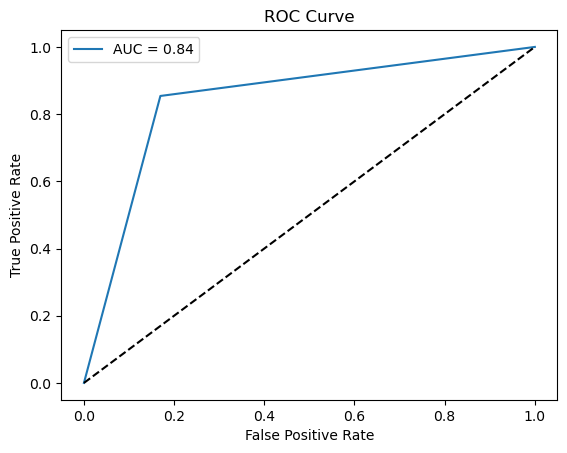

In [19]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

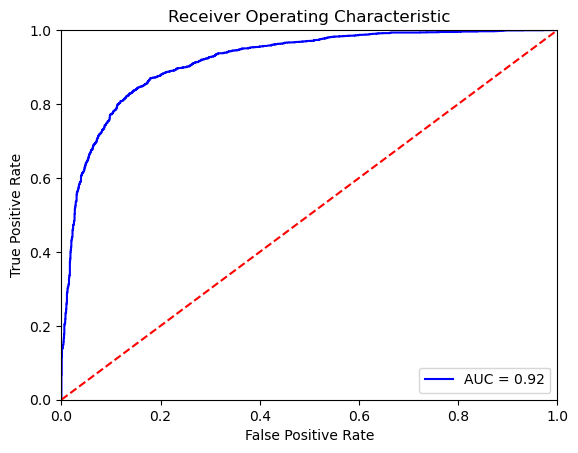

In [20]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot the curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

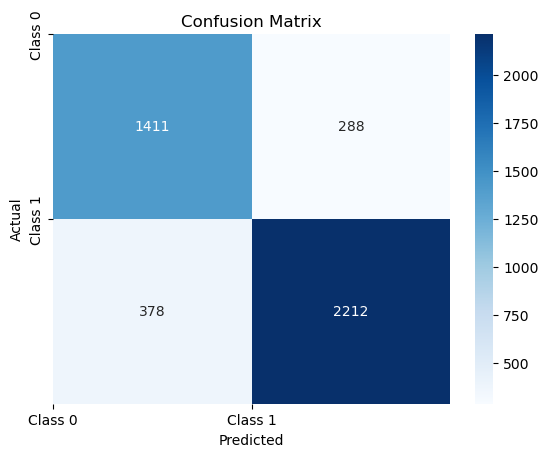

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a list of class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

# Show the plot
plt.show()

# ML Proyect for MoML in Montreal 
### Gaussian Naive-Bayer (G-NB) Classifier applied to a set of compound with biological activity against tyrosine kinases.

In [27]:
#bioactivity_data.drop('molecule_chembl_id', axis=1, inplace=True)
#bioactivity_data.drop('canonical_smiles', axis=1, inplace=True)
#bioactivity_data.drop('standard_value', axis=1, inplace=True)
bioactivity_data.drop('class', axis=1, inplace=True)

bioactivity_data.to_csv("dataset-processed.csv", index=False)
# Let's see what's in the Bank-full data - Jupyter notebooks print the result of the last thing you do
df = pd.read_csv("dataset-processed.csv")  

df.head()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,428.536,6.10362,1,6,4.000000
1,498.630,4.66900,4,6,5.537602
2,288.255,2.14940,3,6,8.000000
3,329.316,1.70110,3,7,5.039529
4,412.497,4.64902,3,5,6.823909


In [29]:
# Now we will check for missing values in the dataset
names = [] # list to store column names
values = [] # list to store number of missing values
def check_missing(df):
    if df.isnull().values.any() :
        print("There is missing in data")
        return True
    else:
        print("Data has no missing values")
        return False

if(check_missing(df)):
    for col_name in df.columns:
        if df[col_name].isnull().any() :
            #print(col_name + " column has "+str(df[col_name].isnull().sum())+" missing values")
            names.append(col_name)
            values.append(df[col_name].isnull().sum())
            
    missing = {"column":names,
              "# of missings":values}
    missingDf = pd.DataFrame(missing)
    print(missingDf)
    missingDf.plot.bar(x="column",y='# of missings', figsize=(6, 6),ylabel="# of missing",xlabel = "Column",color="red")


Data has no missing values


In [30]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [31]:
# We will split the dataset into training and testing sets 
X = df.drop("pIC50", axis=1)
y = labels

df.head()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,428.536,6.10362,1,6,4.000000
1,498.630,4.66900,4,6,5.537602
2,288.255,2.14940,3,6,8.000000
3,329.316,1.70110,3,7,5.039529
4,412.497,4.64902,3,5,6.823909


In [32]:
# Encoding the outcome column to get numerical class
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)


GaussianNB()

In [34]:
# import performance metric libraries 
from sklearn.metrics import (
accuracy_score, 
confusion_matrix, 
ConfusionMatrixDisplay, 
f1_score, 
classification_report
)

In [35]:
# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# measure the performance
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted") 
print("The accuracy of my Naive Bayes Model is:", accuracy) 
print("The F1 Score of my Naive Bayes Model is:", f1)

The accuracy of my Naive Bayes Model is: 0.6768477500582887
The F1 Score of my Naive Bayes Model is: 0.7056865733553217


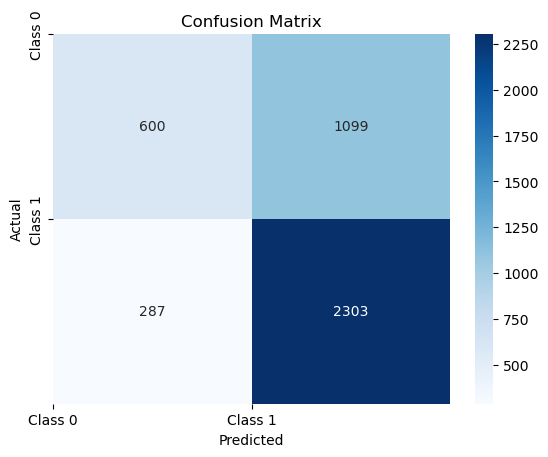

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a list of class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

# Show the plot
plt.show()